Let's Get Started

In [1]:
# Importing the basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## Now let us import the data from the csv file

In [2]:
data = pd.read_csv("weather_classification_data.csv")
data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


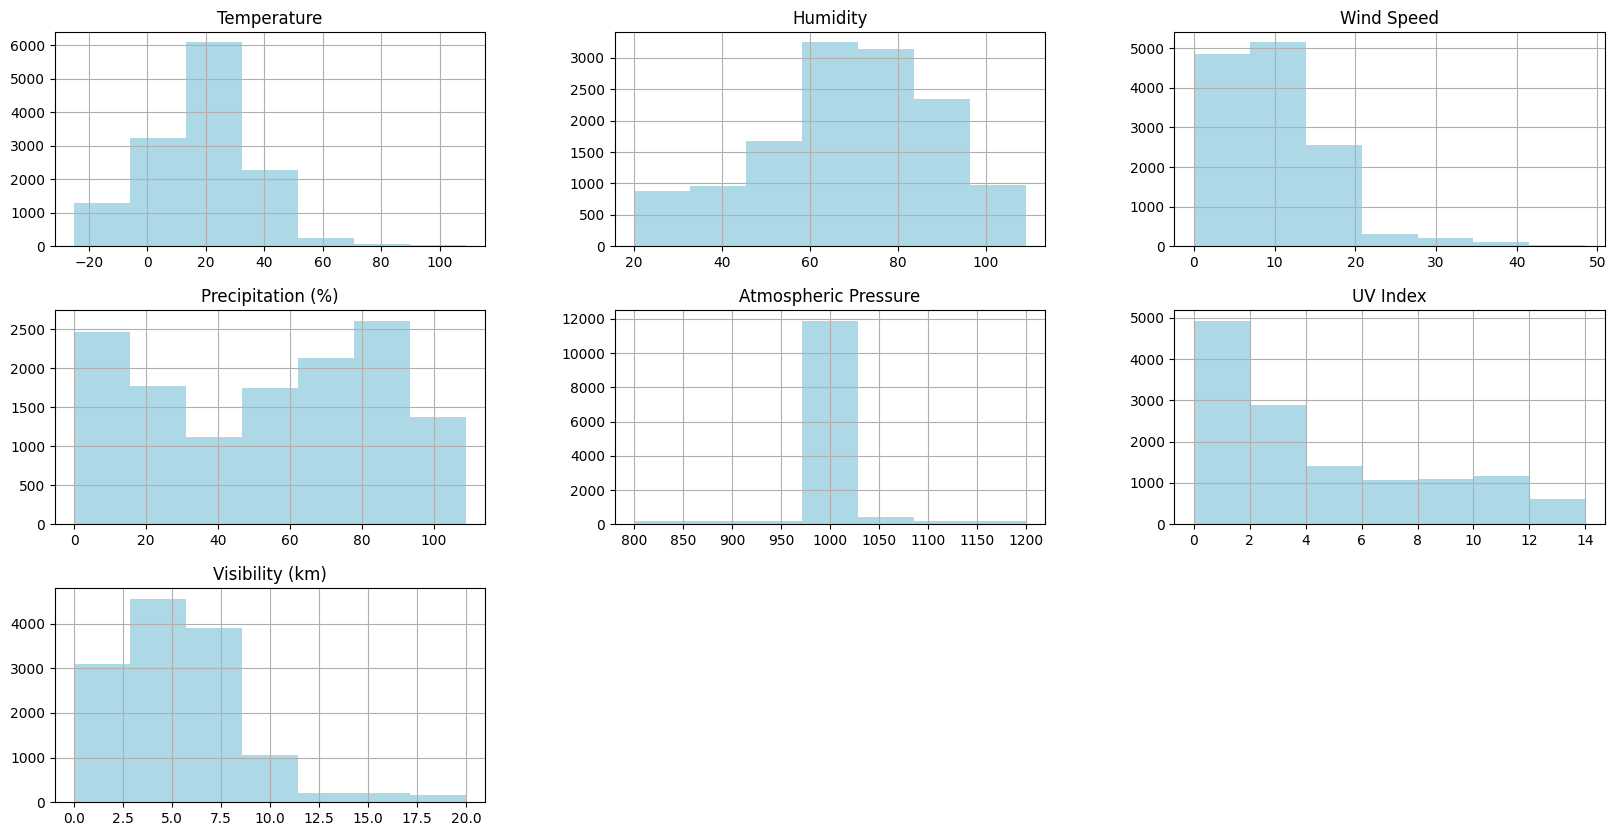

In [3]:
data.hist(figsize = (20, 10),
          bins = 7,
          color = 'lightblue');

In [4]:
data.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [5]:
data.duplicated().sum()

0

## Now we know that are data does not have any missing values or duplicate values in it.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
# Now we will convert the object into numeric types
for label, content in data.items():
    if not pd.api.types.is_any_real_numeric_dtype(content):
        print(label)
        data[label] = content.astype('category').cat.as_ordered()
        data[label] = pd.Categorical(content).codes
        print(data[label].value_counts())

Cloud Cover
Cloud Cover
2    6090
3    4560
0    2139
1     411
Name: count, dtype: int64
Season
Season
3    5610
1    2598
0    2500
2    2492
Name: count, dtype: int64
Location
Location
1    4816
2    4813
0    3571
Name: count, dtype: int64
Weather Type
Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64


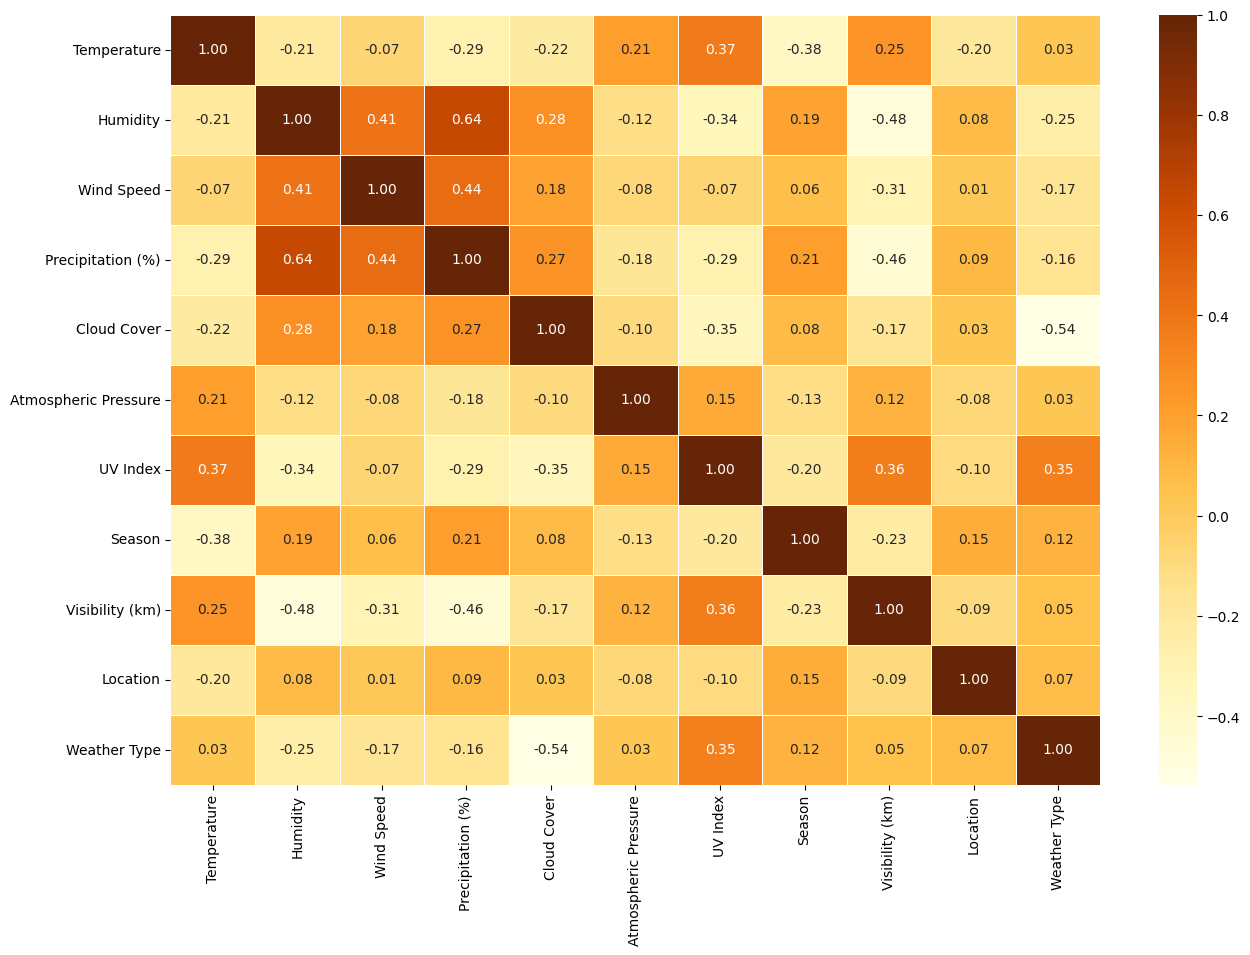

In [8]:
# Lets make our correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot= True,
                 linewidths= 0.5,
                 fmt = ".2f",
                 cmap = "YlOrBr")

## Modelling

In [9]:
# Importing the libraries essential for modeling and paramteer tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [10]:
# Split data into X and y
X = data.drop("Weather Type", axis = 1)
y = data["Weather Type"]

In [11]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 42,
                                                    random_state= 42)

<Axes: >

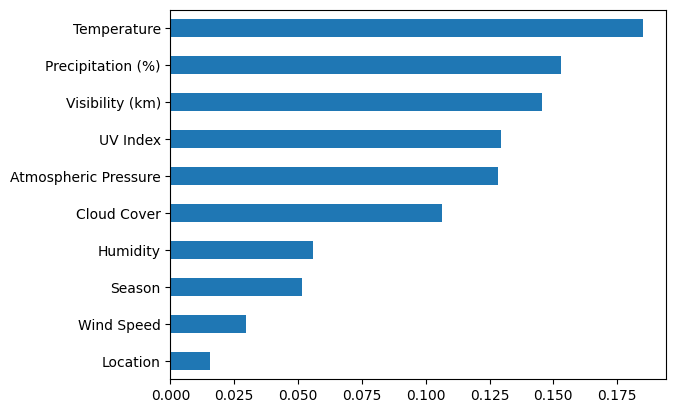

In [12]:
model = RandomForestClassifier()
model.fit(X, y)
imp_feature = pd.Series(model.feature_importances_,
                        index = X.columns).sort_values(ascending= True)
imp_feature.plot(kind = 'barh')

In [13]:
# Put models in a dictionary
clf = {'LogisticRegression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'RandomForest': RandomForestClassifier(),
          'GradientBoosting': GradientBoostingClassifier(),
          'XGBoost': XGBClassifier(),
          'CatBoost': CatBoostClassifier(),
          'AdaBoost': AdaBoostClassifier(),
          'SVC': SVC()}

# Create function to fit and score models
def fit_and_score(models,
                  X_Train = X_train,
                  X_Test = X_test,
                  Y_Train = y_train,
                  Y_Test = y_test):
    
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_Train: Training Data (no labels)
    X_Test: Testing Data (no labels)
    Y_Train: Training Data (no labels)
    Y_Test: testing labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_score = {}

    # Loop through the models
    for name, model in models.items():
        # Fit the data to the model
        model.fit(X_Train, Y_Train)
        # Evaluate the model and append its score to model_Scores
        model_score[name] = model.score(X_Test, Y_Test)
    return model_score

In [14]:
scores = fit_and_score(models= clf)

c:\Users\Paras\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.090241
0:	learn: 1.1794317	total: 140ms	remaining: 2m 19s
1:	learn: 1.0329198	total: 149ms	remaining: 1m 14s
2:	learn: 0.9203868	total: 157ms	remaining: 52.2s
3:	learn: 0.8304757	total: 164ms	remaining: 40.9s
4:	learn: 0.7563343	total: 170ms	remaining: 33.9s
5:	learn: 0.6947809	total: 176ms	remaining: 29.2s
6:	learn: 0.6420549	total: 183ms	remaining: 25.9s
7:	learn: 0.5971139	total: 189ms	remaining: 23.4s
8:	learn: 0.5562327	total: 199ms	remaining: 22s
9:	learn: 0.5216194	total: 209ms	remaining: 20.7s
10:	learn: 0.4911459	total: 217ms	remaining: 19.5s
11:	learn: 0.4638399	total: 225ms	remaining: 18.5s
12:	learn: 0.4393996	total: 235ms	remaining: 17.8s
13:	learn: 0.4177794	total: 279ms	remaining: 19.6s
14:	learn: 0.3980823	total: 299ms	remaining: 19.6s
15:	learn: 0.3804179	total: 310ms	remaining: 19.1s
16:	learn: 0.3646528	total: 316ms	remaining: 18.3s
17:	learn: 0.3501017	total: 325ms	remaining: 17.7s
18:	learn: 0.3368327	total: 332ms	remaining: 17.1s
19:	learn: 

c:\Users\Paras\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [15]:
scores

{'LogisticRegression': 0.7857142857142857,
 'KNN': 0.9047619047619048,
 'RandomForest': 0.9047619047619048,
 'GradientBoosting': 0.9285714285714286,
 'XGBoost': 0.9047619047619048,
 'CatBoost': 0.8809523809523809,
 'AdaBoost': 0.8809523809523809,
 'SVC': 0.7380952380952381}

### We observe that base models of Random Forest, XGBoost and KNN both share the same accuracy. GradienBoosting has the highest accuracy lets try tuning the hyperparameters

In [16]:
def Tuning(grid,
           model,
           X_Train = X_train,
           X_Test = X_test,
           Y_Train = y_train,
           Y_Test = y_test):
    
    """
    Fits and evaluates given machine learning models for different hyper parameters.
    grid: Dict of the hyperarameters you want to adjust
    models: a dict of different Scikit-Learn machine learning models.
    X_Train: Training Data (no labels).
    X_Test: Testing Data (no labels).
    Y_Train: Training Data (no labels).
    Y_Test: testing labels.
    """
    # Setting up random state
    np.random.seed(42)
    print(f'We are starting with the Tuning of {model} model')

    Random_search = RandomizedSearchCV(model,
                                       param_distributions= grid,
                                       n_iter = 2000,
                                       verbose = True,
                                       n_jobs = -1)
    
    Random_search.fit(X_Train, Y_Train)

    print(Random_search.best_params_)

    score = Random_search.score(X_Test, Y_Test)
    print(f"Accuracy: {score}")
    return Random_search

Storing the adjustable hyperparamters for the models

In [17]:
# Random Forest Classifier Grid
RF_grid = {
    "n_estimators": [10, 50, 100, 150, 200],
    "max_features": ['sqrt', 'log2', 'None'],
    "max_depth": [None, 3, 5, 10, 15 ],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# KNN Grid
KNN_Grid = {
    "n_neighbors": range(1, 30, 1),
    "leaf_size": range(1, 50, 1),
    "p": [1, 2],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# XG Boost Grid
XG_Grid = {
    "n_estimators": [100, 150, 200, 250, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    "booster": ['gbtree', 'gblinear', 'dart'],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [0.2, 0.5, 1],
    "base_score": [0.2, 0.5, 1]
}

# Gradient Grid
Gradient_Grid = {
    "loss": ['log_loss', 'exponential'],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    "n_estimators": [100, 150, 200, 250, 300],
    "max_depth": [None, 3, 5, 10],
    "min_sampled_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [ ]:
RF_model = Tuning(model= RandomForestClassifier(),
                  grid = RF_grid)

We are starting with the Tuning of RandomForestClassifier() model
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


KeyboardInterrupt: 

In [20]:
KNN_model = Tuning(model = KNeighborsClassifier(),
                   grid = KNN_Grid)

We are starting with the Tuning of KNeighborsClassifier() model
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
{'p': 1, 'n_neighbors': 13, 'leaf_size': 31, 'algorithm': 'kd_tree'}
Accuracy: 0.9047619047619048


In [21]:
XG_model = Tuning(model = XGBClassifier(),
                  grid = XG_Grid)

# Take into accout early stopping whil running it next time.

We are starting with the Tuning of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


In [ ]:
Grad_model = Tuning(model = GradientBoostingClassifier(),
                    grid = Gradient_Grid)